In [ ]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab24](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24.ipynb)

___

# <font color=green>Laboratory 24: "Predictor-Response Data Models"</font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Laboratory 24 

## Exercise: Watershed Response Metrics 

### Background 
Rainfall-Runoff response prediction is a vital step in engineering design for mitigating flood-induced infrastructure failure.   One easy to measure characteristic of a watershed is its drainage area.  Harder to quantify are its characteristic response time, and its conversion (of precipitation into runoff) factor.

### Study Database

The [watersheds.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/watersheds.csv) dataset contains (measured) drainage area for 92 study watersheds in Texas from [Cleveland, et. al., 2006](https://192.168.1.75/documents/about-me/MyWebPapers/journal_papers/ASCE_Irrigation_Drainage_IR-022737/2006_0602_IUHEvalTexas.pdf), and the associated data:

|Columns|Info.|
|:---|:---|
|STATION_ID |USGS HUC-8 Station ID code|
|TDA |Total drainage area (sq. miles) |
|RCOEF|Runoff Ratio (Runoff Depth/Precipitation Depth)|
|TPEAK|Characteristic Time (minutes)|
|FPEAK|Peaking factor (same as NRCS factor)|
|QP_OBS|Observed peak discharge (measured)|
|QP_MOD|Modeled peak discharge (modeled)| 

### :

Using the following steps, build a predictor-response type data model. 


<hr/><hr/> 

**Step 1:** 

<hr/>

Read the "watersheds.csv" file as a dataframe. Explore the dataframe and in a markdown cell briefly describe the summarize the dataframe. <br>

In [42]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("watersheds.csv")
# read data file
# summarize contents + markdown cell as needed
df.describe()

,TDA,RCOEF,TPEAK,FPEAK,QP_OBS,QP_MOD
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,16.809130,0.321473,234.292174,4.228043,0.007499,0.004811
std,29.272612,0.162198,211.798151,2.997854,0.005721,0.004245
min,0.260000,0.011400,18.000000,1.310000,0.000393,0.000089
25%,3.037500,0.183400,88.767500,2.455000,0.002800,0.001830
50%,6.965000,0.308000,189.735000,3.365000,0.005720,0.003250
75%,13.815000,0.424450,282.222500,4.617500,0.010575,0.006713
max,166.000000,0.712900,1150.500000,17.940000,0.023000,0.022400


In [12]:
df.head()

,STATION_ID,TDA,RCOEF,TPEAK,FPEAK,QP_OBS,QP_MOD
0,08158920,6.3,0.3083,127.43,1.61,0.00932,0.005150
1,08158930,19.0,0.2108,190.44,3.69,0.00521,0.002680
2,08158970,27.6,0.1838,339.06,5.59,0.00454,0.001910
3,08154700,22.3,0.1803,266.64,2.86,0.00498,0.003080
4,08155200,89.7,0.1876,722.50,2.25,0.00184,0.000745


# the data ub watersheds.csv has 92 entries of 6 columnds each, the first being an id integer and the rest being floats (measurements)

<hr/><hr/> 

**Step 2:** <hr/>

Make a data model using **TDA** as a predictor of **TPEAK** ($T_{peak} = \beta_{0}+\beta_{1}*TDA$) <br> Plot your model and the data on the same plot. Report your values of the parameters.

array([  6.3 ,  19.  ,  27.6 ,  22.3 ,  89.7 , 116.  , 124.  , 166.  ,
         8.24,  23.1 ,   4.61,  12.6 ,  37.71,   5.57,  12.1 ,  51.3 ,
        13.1 ,   2.79,   7.03,   7.56,  12.3 ,   3.12,   3.58,   2.31,
         4.13,   5.22,  12.2 ,  24.  ,  21.  ,   7.83,  13.42,   1.22,
         1.94,   7.51,   9.42,   9.03,   4.17,   9.94,   4.75,   6.77,
         8.5 ,  13.4 ,  23.  ,   1.25,   2.53,   6.92,   7.98,   5.91,
        11.26,   8.05,   3.26,   9.54,   4.05,   2.45,   2.33,   0.26,
         0.45,   0.33,   2.43,   5.57,  15.  ,   1.19,   1.08,   2.15,
        17.7 ,   0.97,   1.35,   0.38,   5.64,  12.3 ,   5.41,   3.42,
        21.8 ,   4.02,  70.4 ,   3.29,   8.43,   7.01,   3.18,  22.2 ,
        48.6 ,   5.25,   2.14,   1.26,   6.82,  21.6 ,   0.77,  17.6 ,
         2.1 ,  75.5 , 116.  ,   1.94])

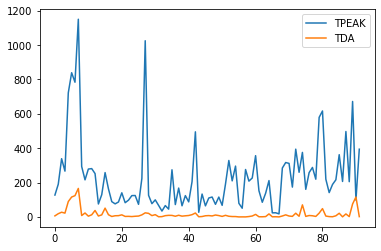

In [30]:
# 
fig, ax = plt.subplots()
tdaSet = np.array(df['TDA'])
tpeakSet = np.array(df['TPEAK'])

data = pd.DataFrame({'TPEAK':tpeakSet, 'TDA':tdaSet})

data.plot(ax=ax)
tdaSet

Please enter an input for b0 0
Please enter an input for b1 5


<AxesSubplot:>

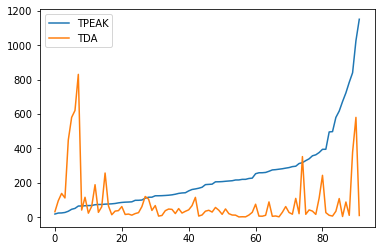

In [41]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'TPEAK')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['TPEAK'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1* sorted_df['TDA'][i])
data = pd.DataFrame({'TPEAK':sortedTdaPeakSet, 'TDA':sortedTdaSet})

data.plot(ax=ax)

<hr/><hr/> 

**Step 3:**

<hr/>

Make a data model using **log(TDA)** as a predictor of **TPEAK** ($T_{peak} = \beta_{0}+\beta_{1}*log(TDA)$)

In your opinion which mapping of **TDA**  (arithmetic or logarithmic) produces a more useful graph? 

Please enter an input for b0 1
Please enter an input for b1 10


<AxesSubplot:>

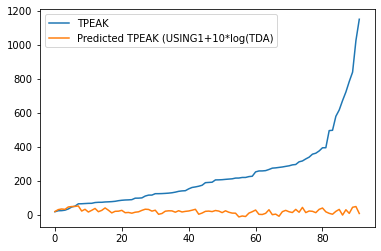

In [45]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'TPEAK')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['TPEAK'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1*math.log(sorted_df['TDA'][i]))
data = pd.DataFrame({'TPEAK':sortedTdaPeakSet, 'Predicted TPEAK (USING'+ str(b0)+ '+'+str(b1)+'*log(TDA)':sortedTdaSet})

data.plot(ax=ax)

In [ ]:
It appears the logbased it more useful.